In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.categorical

In [3]:
data = pd.read_csv('data_merged.csv')

Verificación de columnas

In [4]:
data 

,Id,Id_user,Id_item,App_name,Genres,Developer,Release_date,Price,Recommend,Posted,Sentiment_analysis,Playtime_forever
0,2220076561197970982479,76561197970982479,22200,Zeno Clash,Action,ACE Team,2009.0,9.99,1,2011,2,271
1,125076561197970982479,76561197970982479,1250,Killing Floor,Action,Tripwire Interactive,2009.0,19.99,1,2011,2,10006
2,227300js41637,js41637,227300,Euro Truck Simulator 2,Indie,SCS Software,2013.0,19.99,1,2013,1,551
3,239030js41637,js41637,239030,"Papers, Please",Adventure,3909,2013.0,9.99,1,2013,1,349
4,107200evcentric,evcentric,107200,Space Pirates and Zombies,Action,MinMax Games Ltd.,2011.0,9.99,1,2014,2,3225
...,...,...,...,...,...,...,...,...,...,...,...,...
32509,73076561198239215706,76561198239215706,730,Counter-Strike: Global Offensive,Action,Valve,2012.0,14.99,1,2015,1,4659
32510,730wayfeng,wayfeng,730,Counter-Strike: Global Offensive,Action,Valve,2012.0,14.99,1,2015,1,42740
32511,25398076561198251004808,76561198251004808,253980,Enclave,RPG,Starbreeze,2003.0,4.99,1,2015,2,1098
32512,73072947282842,72947282842,730,Counter-Strike: Global Offensive,Action,Valve,2012.0,14.99,1,2015,0,33


Tipo de datos en las columnas del dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  32514 non-null  object 
 1   Id_user             32514 non-null  object 
 2   Id_item             32514 non-null  int64  
 3   App_name            32514 non-null  object 
 4   Genres              32514 non-null  object 
 5   Developer           32514 non-null  object 
 6   Release_date        32514 non-null  float64
 7   Price               32514 non-null  float64
 8   Recommend           32514 non-null  int64  
 9   Posted              32514 non-null  int64  
 10  Sentiment_analysis  32514 non-null  int64  
 11  Playtime_forever    32514 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB


Descripción de valores estadísticos del dataframe

In [6]:
data.describe()

,Id_item,Release_date,Price,Recommend,Posted,Sentiment_analysis,Playtime_forever
count,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000
mean,166228.639355,2012.108015,14.736219,0.911946,2014.202005,1.319893,9626.051639
std,123104.156724,3.121439,13.734928,0.283378,0.819540,0.694274,23157.015638
min,10.000000,1989.000000,0.000000,0.000000,2010.000000,0.000000,1.000000
25%,17470.000000,2011.000000,6.990000,1.000000,2014.000000,1.000000,431.000000
50%,212480.000000,2013.000000,14.990000,1.000000,2014.000000,1.000000,1608.000000
75%,252490.000000,2014.000000,19.990000,1.000000,2015.000000,2.000000,7005.750000
max,428880.000000,2017.000000,771.710000,1.000000,2015.000000,2.000000,642773.000000


In [7]:
data['Id_item'] = data['Id_item'].astype(str)

Gráfico de Histograma

<function matplotlib.pyplot.show(close=None, block=None)>

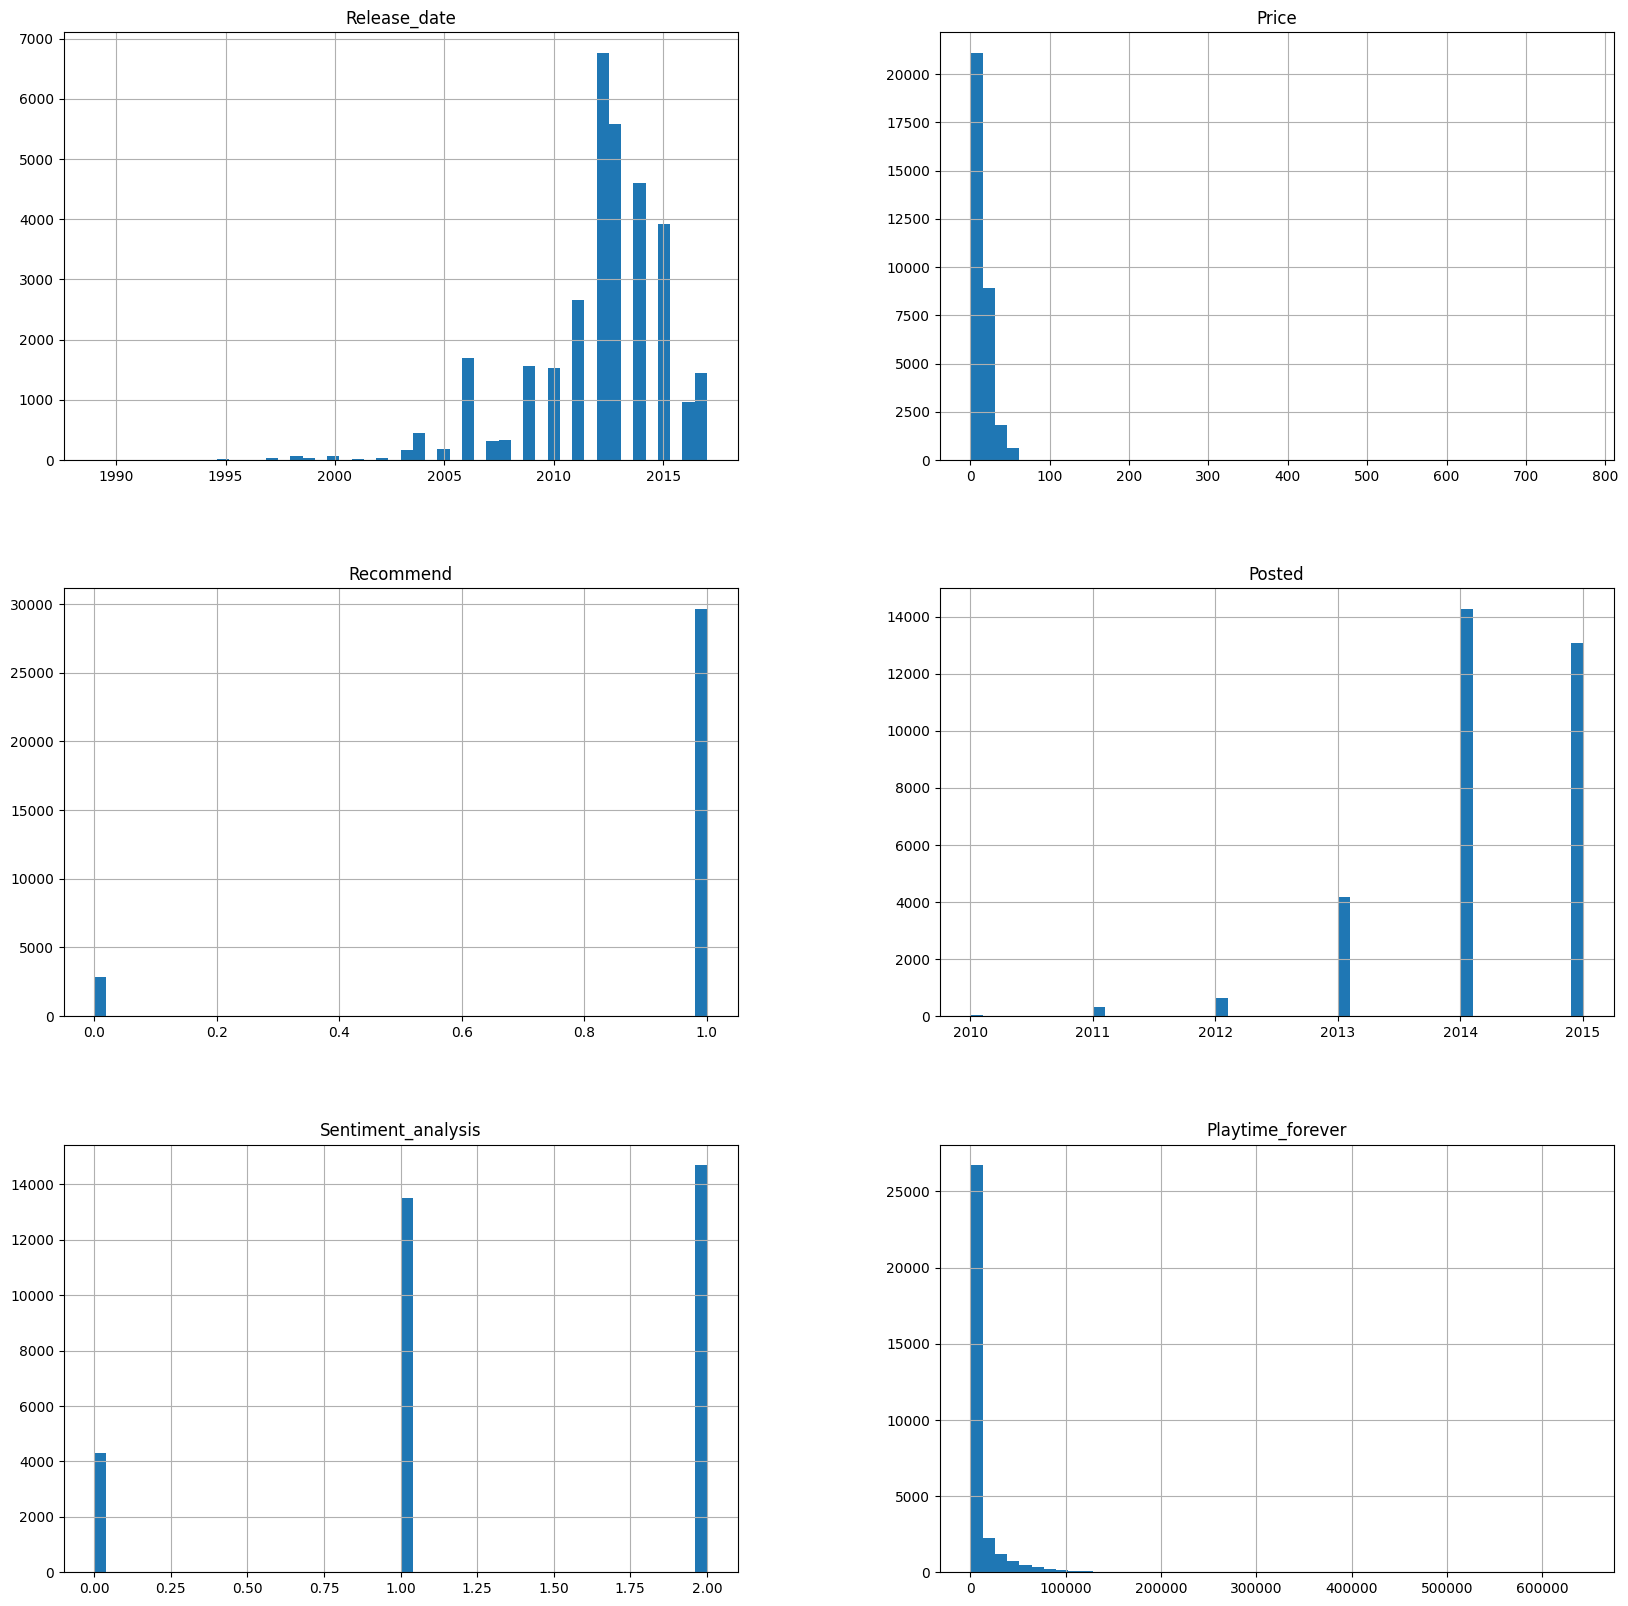

In [8]:
data.hist(bins=50,figsize=(20,20))
plt.show

In [9]:
#Eliminaremos los outliers
data_release_date = data['Release_date']
data_price = data['Price']
data_Playtime_forever = data['Playtime_forever']

Cálculo de cuartiles y del Rango Interquartil

In [10]:
# Calcular cuartiles e IQR para Release_date
quartiles_release_date = data['Release_date'].quantile([0.25, 0.5, 0.75])
iqr_release_date = quartiles_release_date[0.75] - quartiles_release_date[0.25]
print("Cuartiles Release Date:")
print(quartiles_release_date)
print("Interquartile Range Release Date:", iqr_release_date)
print()

# Calcular cuartiles e IQR para Price
quartiles_price = data['Price'].quantile([0.25, 0.5, 0.75])
iqr_price = quartiles_price[0.75] - quartiles_price[0.25]
print("Cuartiles Price:")
print(quartiles_price)
print("Interquartile Range Price:", iqr_price)
print()

# Calcular cuartiles e IQR para Playtime_forever
quartiles_playtime_forever = data['Playtime_forever'].quantile([0.25, 0.5, 0.75])
iqr_playtime_forever = quartiles_playtime_forever[0.75] - quartiles_playtime_forever[0.25]
print("Cuartiles Playtime Forever:")
print(quartiles_playtime_forever)
print("Interquartile Range Playtime Forever:", iqr_playtime_forever)
#Definimos los limites inferiores y superiores para cada variable


Cuartiles Release Date:
0.25    2011.0
0.50    2013.0
0.75    2014.0
Name: Release_date, dtype: float64
Interquartile Range Release Date: 3.0

Cuartiles Price:
0.25     6.99
0.50    14.99
0.75    19.99
Name: Price, dtype: float64
Interquartile Range Price: 12.999999999999998

Cuartiles Playtime Forever:
0.25     431.00
0.50    1608.00
0.75    7005.75
Name: Playtime_forever, dtype: float64
Interquartile Range Playtime Forever: 6574.75


Definición de limites para las columnas

In [11]:
# Definir límites para Release_date
lower_bound_release_date = quartiles_release_date[0.25] - 1.5 * iqr_release_date
upper_bound_release_date = quartiles_release_date[0.75] + 1.5 * iqr_release_date
print("Límite Inferior Release Date:", lower_bound_release_date)
print("Límite Superior Release Date:", upper_bound_release_date)

# Definir límites para Price
lower_bound_price = quartiles_price[0.25] - 1.5 * iqr_price
upper_bound_price = quartiles_price[0.75] + 1.5 * iqr_price
print("Límite Inferior Price:", lower_bound_price)
print("Límite Superior Price:", upper_bound_price)

# Definir límites para Playtime_forever
lower_bound_playtime_forever = quartiles_playtime_forever[0.25] - 1.5 * iqr_playtime_forever
upper_bound_playtime_forever = quartiles_playtime_forever[0.75] + 1.5 * iqr_playtime_forever
print("Límite Inferior Playtime Forever:", lower_bound_playtime_forever)
print("Límite Superior Playtime Forever:", upper_bound_playtime_forever)


Límite Inferior Release Date: 2006.5
Límite Superior Release Date: 2018.5
Límite Inferior Price: -12.509999999999996
Límite Superior Price: 39.489999999999995
Límite Inferior Playtime Forever: -9431.125
Límite Superior Playtime Forever: 16867.875


Eliminación de los outliers

In [12]:
# Filtrar los outliers para Release_date
filtered_data_release_date = data[(data['Release_date'] >= lower_bound_release_date) & (data['Release_date'] <= upper_bound_release_date)]

# Filtrar los outliers para Price
filtered_data_price = data[(data['Price'] >= lower_bound_price) & (data['Price'] <= upper_bound_price)]

# Filtrar los outliers para Playtime_forever
filtered_data_playtime_forever = data[(data['Playtime_forever'] >= lower_bound_playtime_forever) & (data['Playtime_forever'] <= upper_bound_playtime_forever)]


Matriz de dispersión entre las variables

C:\Users\User\AppData\Local\Temp\ipykernel_24268\3898390565.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  271. 10006.   551. ...  1098.    33. 10121.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_data_all.loc[:, 'Playtime_forever'] = np.clip(filtered_data_all['Playtime_forever'], lower_bound_playtime_forever, upper_bound_playtime_forever)
c:\Users\User\PI_ML_OPS\FastApi\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\User\PI_ML_OPS\FastApi\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\User\PI_ML_OPS\FastApi\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


<Figure size 1200x1000 with 0 Axes>

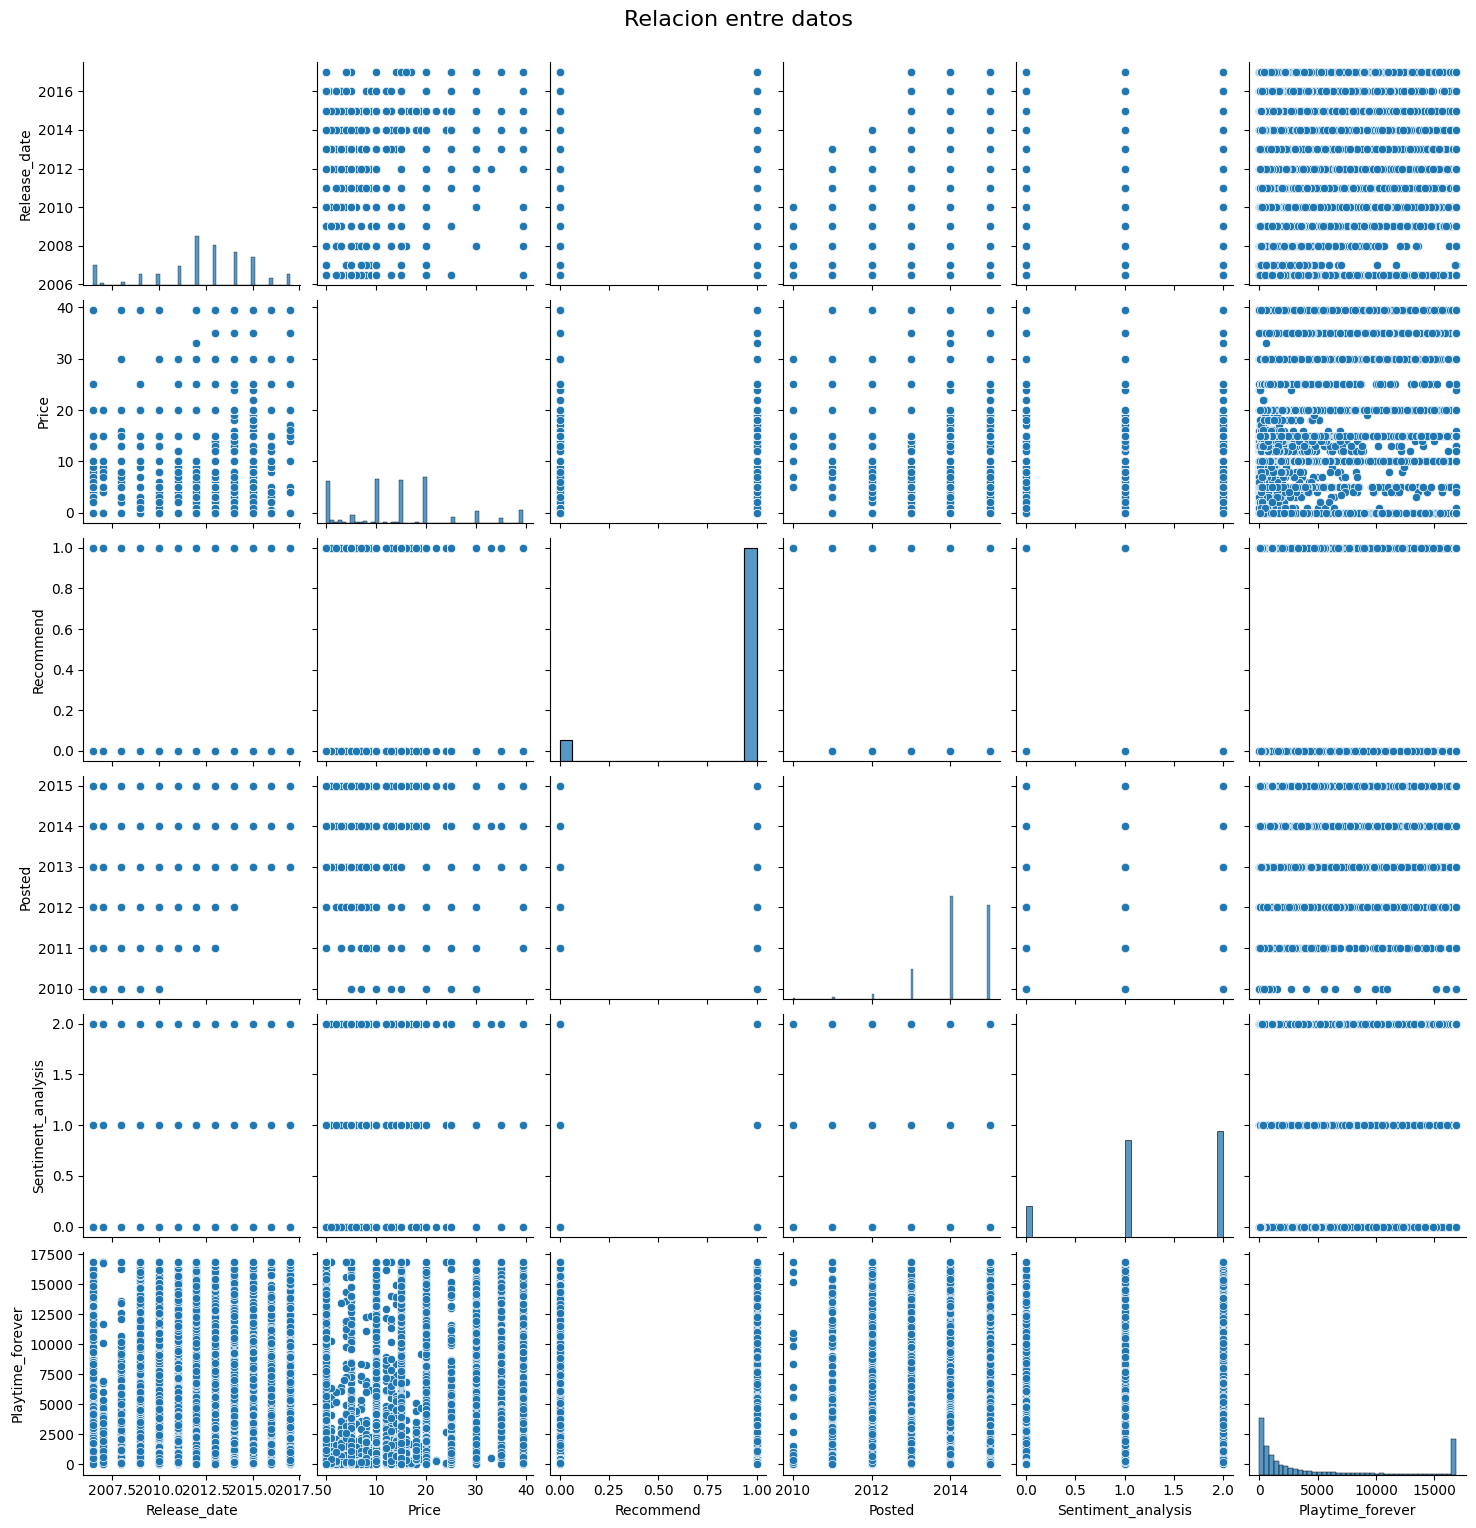

In [13]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Selecciona las columnas de interés
columns_of_interest = ['Release_date', 'Price', 'Recommend', 'Posted', 'Sentiment_analysis', 'Playtime_forever']

# Filtra los datos para incluir solo los valores dentro de los límites intercuartiles
filtered_data_all = data.copy()  # Crea una copia del DataFrame original
filtered_data_all.loc[:, 'Release_date'] = np.clip(filtered_data_all['Release_date'], lower_bound_release_date, upper_bound_release_date)
filtered_data_all.loc[:, 'Price'] = np.clip(filtered_data_all['Price'], lower_bound_price, upper_bound_price)
filtered_data_all.loc[:, 'Playtime_forever'] = np.clip(filtered_data_all['Playtime_forever'], lower_bound_playtime_forever, upper_bound_playtime_forever)

# Crea un scatter matrix con los datos filtrados
scatter_matrix_all = sns.pairplot(filtered_data_all[columns_of_interest], palette='viridis')

# Añade un título
scatter_matrix_all.fig.suptitle('Matriz de dispersión entre las variables', y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()


Boxplot basado en los preciós según géneros

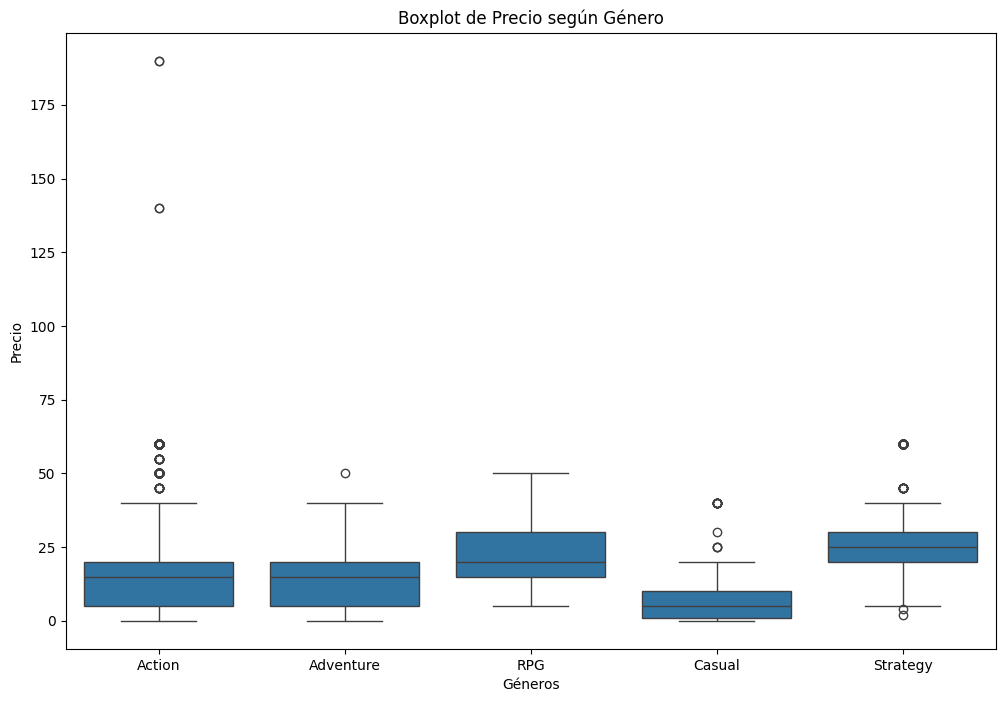

In [14]:
# Excluir el género "Indie" de los géneros más comunes
top_genres = data['Genres'].value_counts().nlargest(6).index 
top_genres = top_genres[top_genres != 'Indie']

# Filtrar los datos para incluir solo los géneros más comunes (sin "Indie")
data_top_genres = data[data['Genres'].isin(top_genres)]

# Ajusta el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crea el boxplot
sns.boxplot(x='Genres', y='Price', data=data_top_genres)

# Añade etiquetas y título
plt.xlabel('Géneros')
plt.ylabel('Precio')
plt.title('Boxplot de Precio según Género')

# Muestra el gráfico
plt.show()


Análisis de dispersión de los datos

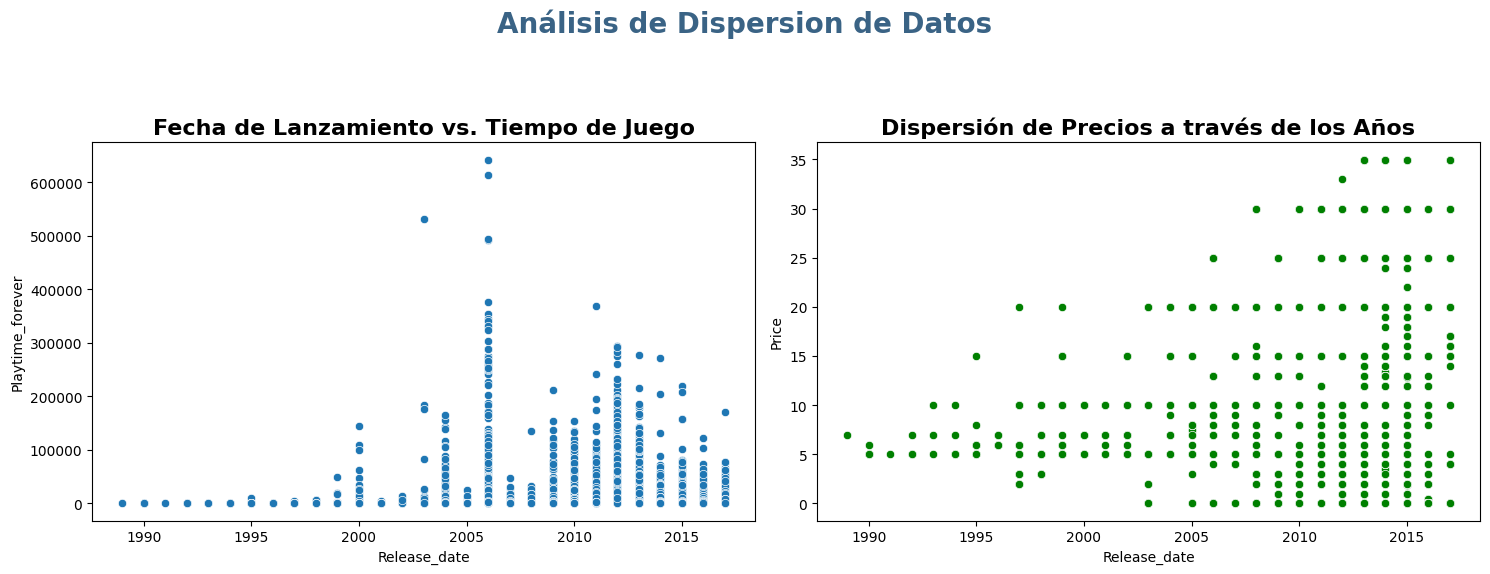

In [15]:
# Configurar subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Análisis de Dispersion de Datos', fontsize=20, fontweight='bold', color='#3a6385')  # Título principal en azul oscuro

# Gráfico 1: Dispersión de datos entre Fecha de Lanzamiento y Tiempo de Juego
sns.scatterplot(x='Release_date', y='Playtime_forever', data=data, ax=axes[0])
axes[0].set_title('Fecha de Lanzamiento vs. Tiempo de Juego', fontsize=16, fontweight='bold')

# Gráfico 2: Dispersión de precios de los juegos a través de los años
sns.scatterplot(x='Release_date', y='Price', data=filtered_data_price, color='green', ax=axes[1])
axes[1].set_title('Dispersión de Precios a través de los Años', fontsize=16, fontweight='bold')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Mostrar el gráfico
plt.show()



Relación entre variables con el filtro de análisis de sentimiento

C:\Users\User\AppData\Local\Temp\ipykernel_24268\2284354247.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  271. 10006.   551. ...  1098.    33. 10121.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  subset_data.loc[:, 'Playtime_forever'] = np.clip(subset_data['Playtime_forever'], lower_bound_playtime_forever, upper_bound_playtime_forever)


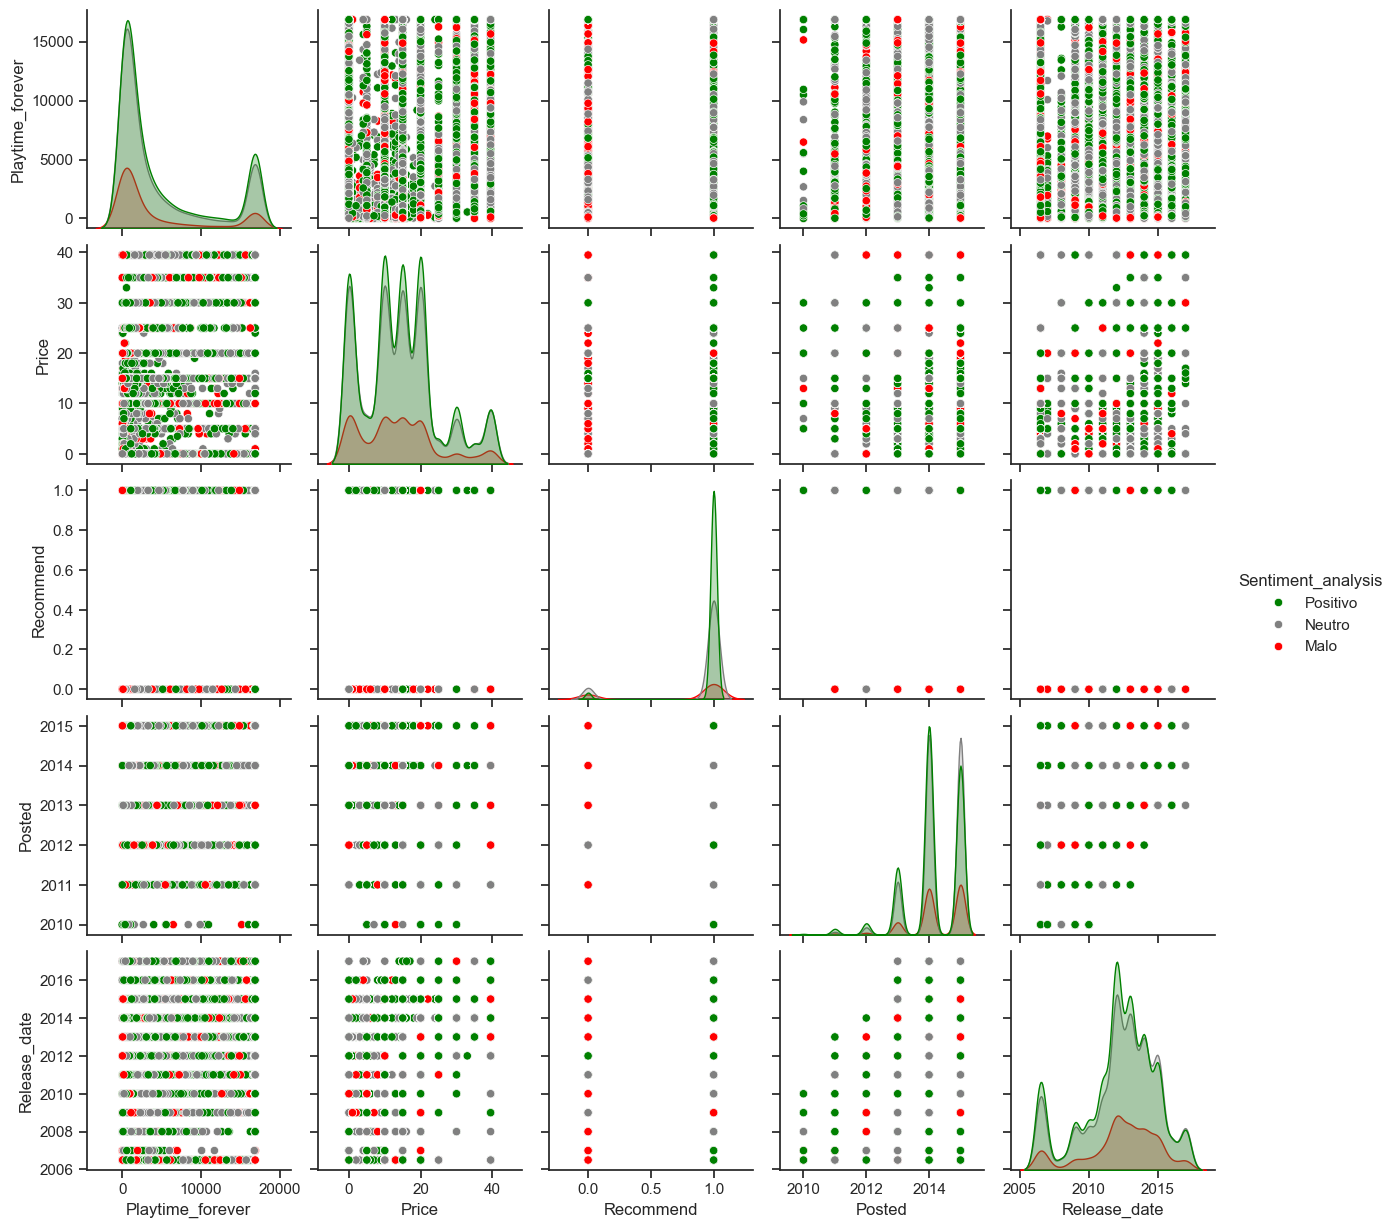

In [16]:
# Seleccionar las columnas de interés
columns_of_interest = ['Sentiment_analysis', 'Playtime_forever', 'Price', 'Recommend', 'Posted', 'Release_date']
subset_data = data[columns_of_interest].copy()  # Crear una copia del DataFrame original

# Reemplazar los valores atípicos en las columnas seleccionadas
subset_data.loc[:, 'Release_date'] = np.clip(subset_data['Release_date'], lower_bound_release_date, upper_bound_release_date)
subset_data.loc[:, 'Price'] = np.clip(subset_data['Price'], lower_bound_price, upper_bound_price)
subset_data.loc[:, 'Playtime_forever'] = np.clip(subset_data['Playtime_forever'], lower_bound_playtime_forever, upper_bound_playtime_forever)

# Reemplazar los valores numéricos por etiquetas deseadas
subset_data['Sentiment_analysis'] = subset_data['Sentiment_analysis'].replace({0: 'Malo', 1: 'Neutro', 2: 'Positivo'})

# Configurar el estilo de seaborn
sns.set(style="ticks")

# Crear el pairplot con colores personalizados
custom_palette = {'Positivo': 'green', 'Malo': 'red', 'Neutro': 'gray'}
sns.pairplot(subset_data, hue='Sentiment_analysis', palette=custom_palette)

# Mostrar el gráfico
plt.show()



Matriz de correlación entre las variables seleccionadas

                  Playtime_forever     Price  Recommend    Posted  \
Playtime_forever          1.000000  0.023193   0.054189  0.025868   
Price                     0.023193  1.000000  -0.018020  0.001984   
Recommend                 0.054189 -0.018020   1.000000 -0.113188   
Posted                    0.025868  0.001984  -0.113188  1.000000   
Release_date             -0.122787  0.042846  -0.076627  0.269421   

                  Release_date  
Playtime_forever     -0.122787  
Price                 0.042846  
Recommend            -0.076627  
Posted                0.269421  
Release_date          1.000000  


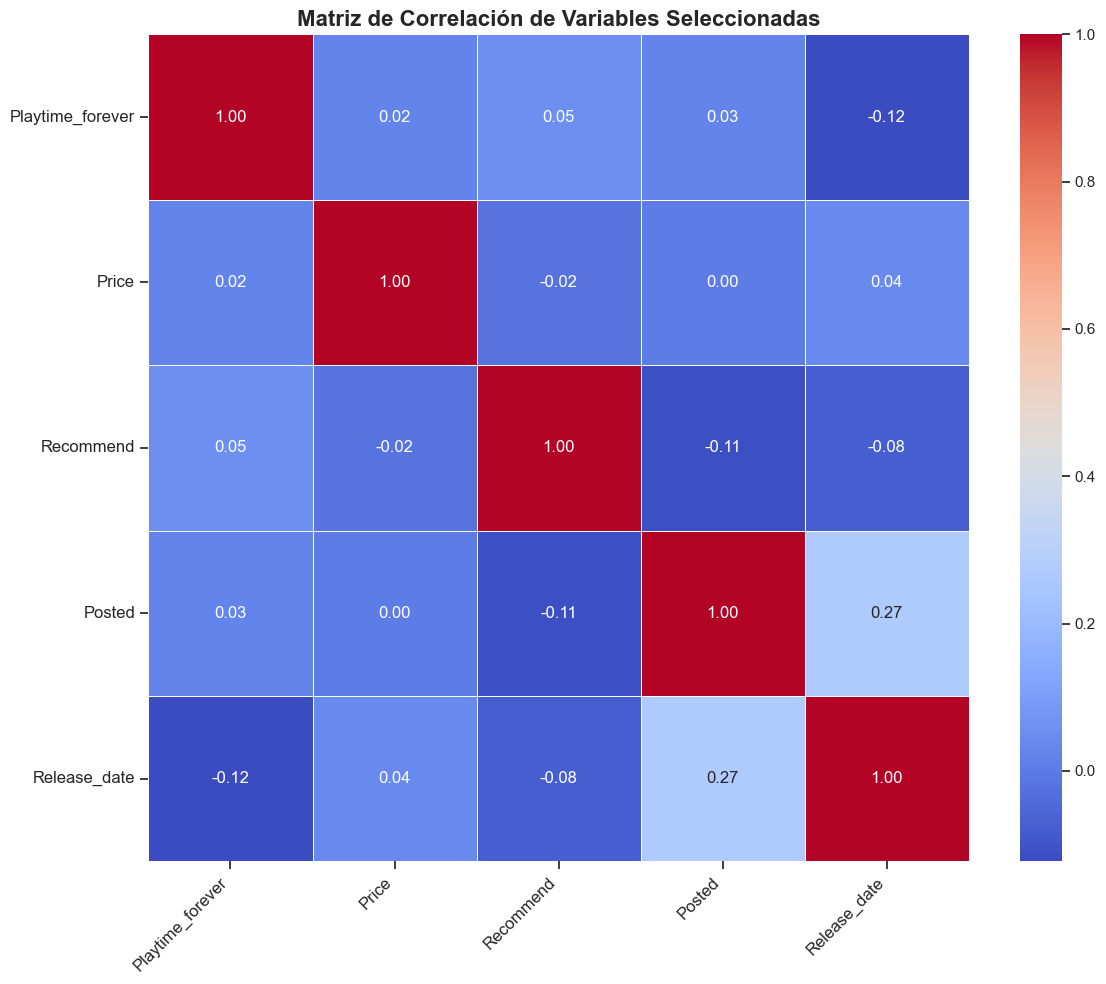

In [17]:
# Seleccionar las columnas de interés
columns_of_interest = ['Playtime_forever', 'Price', 'Recommend', 'Posted', 'Release_date']
subset_data = data[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = subset_data.corr()
print(correlation_matrix)

# Ajustar el tamaño del heatmap
plt.figure(figsize=(12, 10))

# Graficar la matriz de correlación con detalles
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar=True)

# Añadir un título al heatmap
plt.title("Matriz de Correlación de Variables Seleccionadas", fontsize=16, weight='bold')

# Ajustar la rotación de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar el tamaño de la fuente de las etiquetas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el espacio vertical para asegurar que todas las etiquetas sean visibles
plt.tight_layout()

# Mostrar el heatmap
plt.show()


Top 9 developers

C:\Users\User\AppData\Local\Temp\ipykernel_24268\1311969120.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Developer', data=data_top_developers, order=top_developers, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_24268\1311969120.py:9: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Developer', data=data_top_developers, order=top_developers, palette=colors)


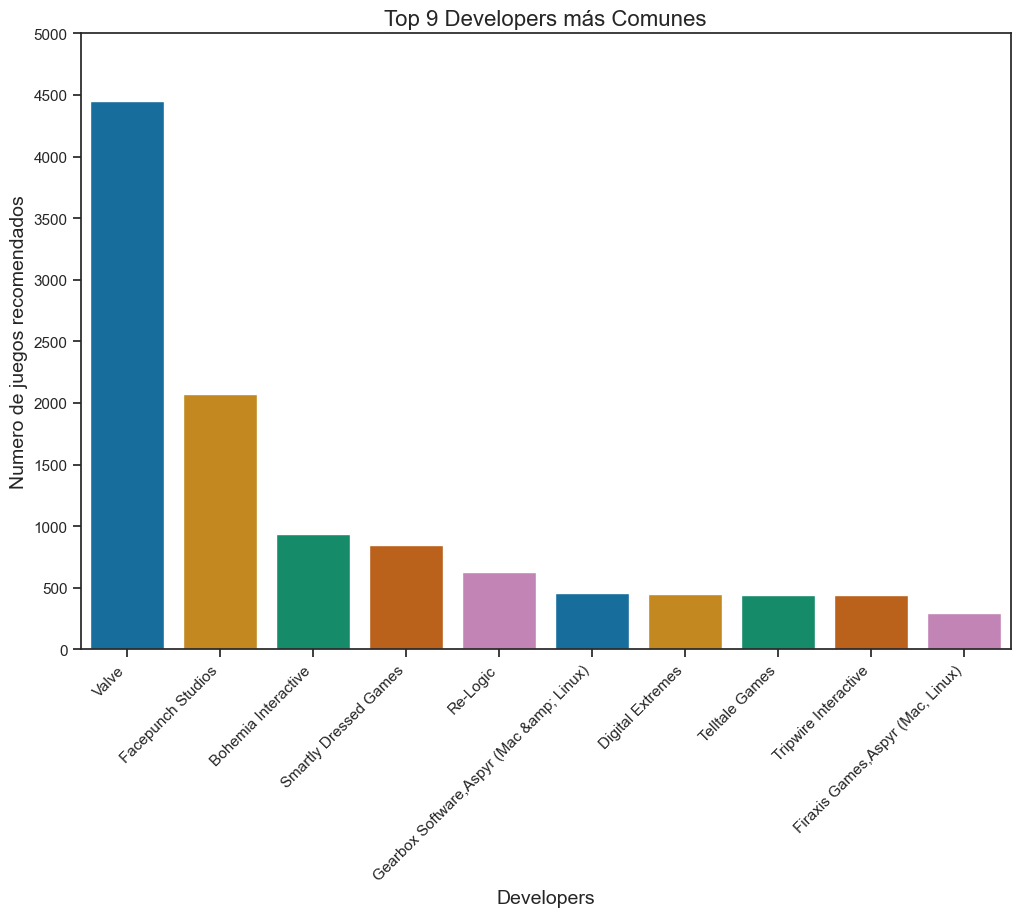

In [18]:
# Crear una figura más grande
plt.figure(figsize=(12, 8))
top_developers = data['Developer'].value_counts().nlargest(10).index
# Filtrar el DataFrame solo para los 5 primeros géneros
data_top_developers = data[data['Developer'].isin(top_developers )]
# Definir colores personalizados
colors = sns.color_palette("colorblind")[:5]
# Graficar el conteo con barras personalizadas
sns.countplot(x='Developer', data=data_top_developers, order=top_developers, palette=colors)

# Personalizar ejes y etiquetas
plt.title('Top 9 Developers', fontsize=16)
plt.xlabel('Developers', fontsize=14)
plt.ylabel('Numero de juegos recomendados', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mayor legibilidad
plt.yticks(range(0, 5001, 500))  # División en el eje y cada 5000

# Mostrar la gráfica
plt.show()

Top 9 géneros más jugados

C:\Users\User\AppData\Local\Temp\ipykernel_24268\719753263.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genres', data=data_top_genres, order=top_genres, palette=colors)
C:\Users\User\AppData\Local\Temp\ipykernel_24268\719753263.py:14: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Genres', data=data_top_genres, order=top_genres, palette=colors)


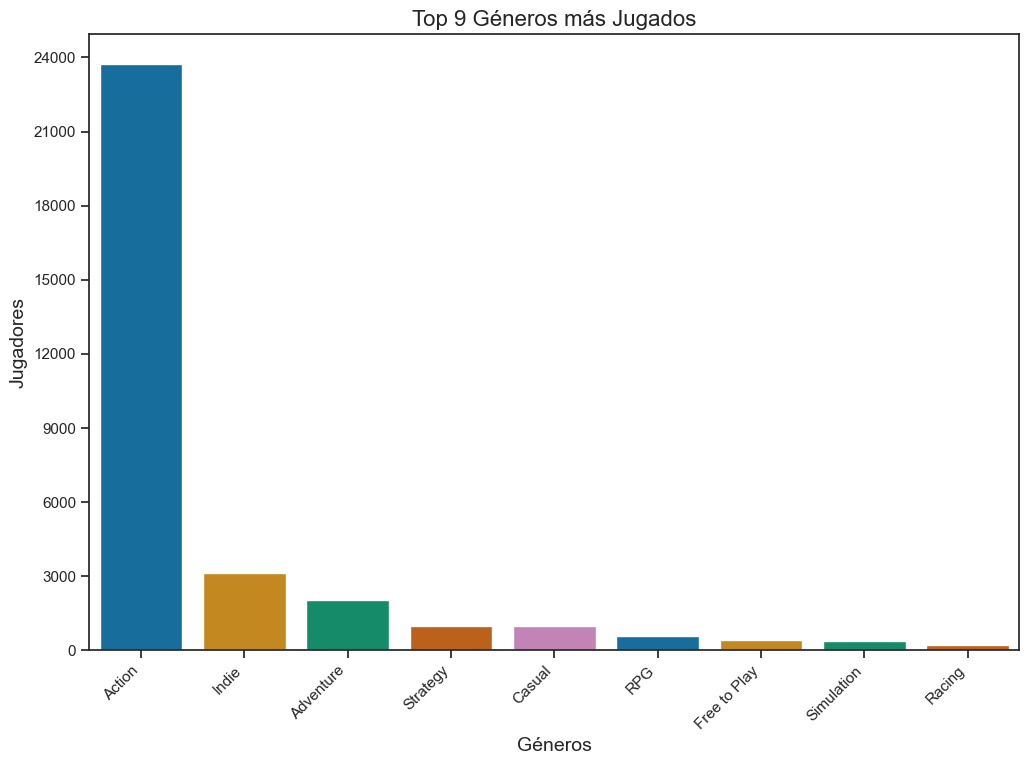

In [19]:
# Crear una figura más grande
plt.figure(figsize=(12, 8))

# Seleccionar los 5 primeros géneros
top_genres = data['Genres'].value_counts().nlargest(9).index

# Filtrar el DataFrame solo para los 5 primeros géneros
data_top_genres = data[data['Genres'].isin(top_genres)]

# Definir colores personalizados
colors = sns.color_palette("colorblind")[:5]

# Graficar el conteo con barras personalizadas
sns.countplot(x='Genres', data=data_top_genres, order=top_genres, palette=colors)

# Personalizar ejes y etiquetas
plt.title('Top 9 Géneros más Jugados', fontsize=16)
plt.xlabel('Géneros', fontsize=14)
plt.ylabel('Jugadores', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mayor legibilidad
plt.yticks(range(0, 25001, 3000))  # División en el eje y cada 5000
# Mostrar la gráfica
plt.show()


Proporción de recomendaciones positivas y negativas

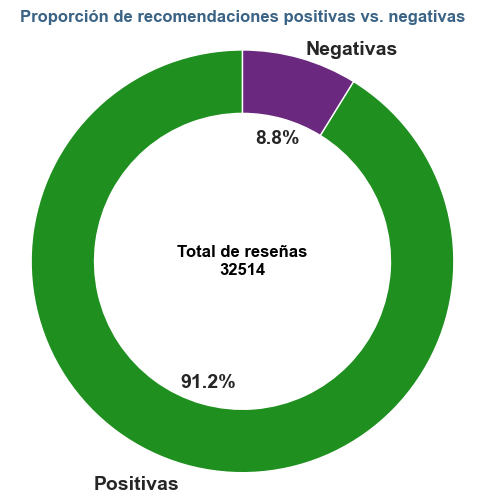

In [20]:
# Contar el número de reseñas positivas y negativas
num_positivas = (data['Recommend'] == 1).sum()
num_negativas = (data['Recommend'] == 0).sum()
total_resenas = len(data)

# Seleccionar una paleta de colores personalizada (verde oscuro y morado oscuro)
colores = ['#1f8f1f', '#6a287e']  # Verde oscuro y morado oscuro

# Crear el gráfico
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie([num_positivas, num_negativas], labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops=dict(width=0.3, edgecolor='w'), textprops=dict(size=14, weight='bold'))

# Añadir el total de reseñas en el centro
plt.text(0, 0, f'Total de reseñas\n{total_resenas}', ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Desplazar la etiqueta 'Negativas' hacia abajo
texts[1].set_position((0.3, 1.0))

# Ajustar el aspecto del gráfico para que sea un círculo
plt.axis('equal')

# Título del gráfico
plt.title('Proporción de recomendaciones positivas vs. negativas', fontsize=12, fontweight='bold', color='#3a6385')

# Mostrar el gráfico
plt.show()

Análisis de reseñas

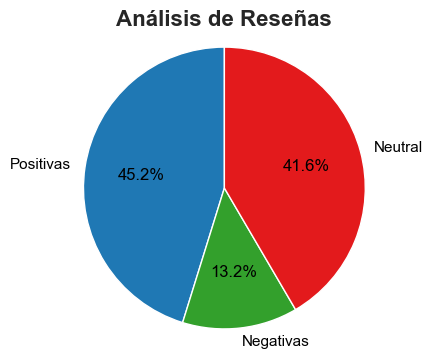

In [21]:
# Supongamos que 'Sentiment_analysis' es una columna en tus datos
plt.figure(figsize=(4, 4))

# Contar las frecuencias de cada categoría
count_positivas = (data['Sentiment_analysis'] == 2).sum()
count_negativas = (data['Sentiment_analysis'] == 0).sum()
count_neutral = (data['Sentiment_analysis'] == 1).sum()

# Etiquetas y colores intensos
labels = ['Positivas', 'Negativas', 'Neutral']
colors = ['#1f78b4', '#33a02c', '#e31a1c']

# Graficar el pastel con sombra, colores intensos y porcentajes
patches, texts, autotexts = plt.pie([count_positivas, count_negativas, count_neutral],
                                    labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Ajustar el aspecto para que el pastel sea un círculo
plt.axis('equal')

# Añadir un título
plt.title('Análisis de Reseñas', fontsize=16, weight='bold')

# Ajustar el color de fondo
plt.gca().set_facecolor('#f5f5f5')

# Modificar el color del texto
for text in texts + autotexts:
    text.set_color('black')

# Mostrar el gráfico
plt.show()
